In [1]:
# Clone the Pix2Pix repo
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
%cd pytorch-CycleGAN-and-pix2pix



c:\Users\Bryan\Documents\.Sekolah\Research Methodology\Fontdataset\project\pytorch-CycleGAN-and-pix2pix


Cloning into 'pytorch-CycleGAN-and-pix2pix'...


In [2]:
# Install dependencies
!pip install -r requirements.txt

     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     -- ------------------------------------- 0.1/1.4 MB 1.1 MB/s eta 0:00:02
     ----- ---------------------------------- 0.2/1.4 MB 2.1 MB/s eta 0:00:01
     ------------- -------------------------- 0.5/1.4 MB 3.3 MB/s eta 0:00:01
     ---------------------- ----------------- 0.8/1.4 MB 4.6 MB/s eta 0:00:01
     ---------------------------------- ----- 1.2/1.4 MB 5.5 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/22.5 MB ? eta -:--:--
    --------------------------------------- 0.5/22.5 MB 9.6 MB/s eta 0:00:03
   - -------------------------------------- 0.7/22.5 MB 7.6 MB/s eta 0:00:03
   -- ------------------------------------- 1.2/22.5 MB 9.4 MB/s

In [3]:
from PIL import Image, ImageDraw, ImageFont
import os

# Set paths to your uploaded fonts
FONT_ARIAL = "ARIAL.TTF"  # Uploaded Arial font
FONT_TIMES = "times.ttf"  # Uploaded Times font

CHARS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
IMAGE_SIZE = 128
FONT_SIZE = 128
SAVE_DIR = "datasets/font_pix2pix/train"
os.makedirs(SAVE_DIR, exist_ok=True)

def render_char(char, font_path):
    image = Image.new("L", (IMAGE_SIZE, IMAGE_SIZE), color=255)
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype(font_path, FONT_SIZE)

    # Get bounding box of the character
    bbox = font.getbbox(char)
    w, h = bbox[2] - bbox[0], bbox[3] - bbox[1]

    # Center the text
    x = (IMAGE_SIZE - w) / 2 - bbox[0]
    y = (IMAGE_SIZE - h) / 2 - bbox[1]

    draw.text((x, y), char, fill=0, font=font)
    return image

for i, c in enumerate(CHARS):
    img_a = render_char(c, FONT_ARIAL)
    img_b = render_char(c, FONT_TIMES)
    combined = Image.new("L", (IMAGE_SIZE*2, IMAGE_SIZE))
    combined.paste(img_a, (0, 0))
    combined.paste(img_b, (IMAGE_SIZE, 0))
    combined.save(f"{SAVE_DIR}/{i:03d}_{c}.png")

print("Training dataset created!")

OSError: cannot open resource

In [ ]:
import shutil
# Path to your dataset folder
dataset_dir = "datasets/font_pix2pix/train"

# Zip the dataset folder
shutil.make_archive("/content/font_pix2pix_train", 'zip', dataset_dir)

'/content/font_pix2pix_train.zip'

In [ ]:
from google.colab import files

# Download the zip file
files.download("/content/font_pix2pix_train.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch

# Check if GPU is available
gpu_available = torch.cuda.is_available()

print(f"Is GPU available? {gpu_available}")

Is GPU available? True


In [ ]:
!python train.py \
  --dataroot ./datasets/font_pix2pix \
  --name font_style_transfer \
  --model pix2pix \
  --direction AtoB \
  --input_nc 1 --output_nc 1 \
  --n_epochs 150 \
  --n_epochs_decay 150 \
  --batch_size 4 \
  --netG unet_128 \
  --preprocess resize_and_crop \
  --crop_size 128 \
  --save_epoch_freq 10 \
  --load_size 128

----------------- Options ---------------
               batch_size: 4                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 128                           	[default: 256]
                 dataroot: ./datasets/font_pix2pix       	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest           

In [ ]:
!python train.py \
  --dataroot ./datasets/font_pix2pix \
  --name font_style_transfer \
  --model pix2pix \
  --direction AtoB \
  --input_nc 1 --output_nc 1 \
  --n_epochs 50 \
  --n_epochs_decay 50 \
  --batch_size 4 \
  --netG unet_128 \
  --preprocess resize_and_crop \
  --crop_size 64 \
  --save_epoch_freq 10 \
  --continue_train

----------------- Options ---------------
               batch_size: 4                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: ./datasets/font_pix2pix       	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest         

In [ ]:
import shutil
# Path to your dataset folder
dataset_dir = "datasets/font_pix2pix/test"

# Zip the dataset folder
shutil.make_archive("/content/font_pix2pix_test", 'zip', dataset_dir)

'/content/font_pix2pix_test.zip'

In [ ]:
from google.colab import files

# Download the zip file
files.download("/content/font_pix2pix_test.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Create the destination directory if it doesn't exist
!mkdir -p /content/pytorch-CycleGAN-and-pix2pix/checkpoints/font_style_transfer/


In [ ]:
!cp /content/drive/MyDrive/pix2pix_checkpoints/font_style_transfer/latest_net_G.pth \
    /content/pytorch-CycleGAN-and-pix2pix/checkpoints/font_style_transfer/latest_net_G.pth #load from gdrive
!cp /content/drive/MyDrive/pix2pix_checkpoints/font_style_transfer/latest_net_D.pth \
    /content/pytorch-CycleGAN-and-pix2pix/checkpoints/font_style_transfer/latest_net_D.pth

In [ ]:
!python train.py \
  --dataroot ./datasets/font_pix2pix \
  --name font_style_transfer \
  --model pix2pix \
  --direction AtoB \
  --input_nc 1 --output_nc 1 \
  --n_epochs 200 \
  --n_epochs_decay 200 \
  --batch_size 8 \
  --netG unet_128 \
  --preprocess resize_and_crop \
  --crop_size 128 \
  --save_epoch_freq 10 \
  --continue_train \
  --lr 0.0001 \
  --lr_policy step \
  --lr_decay_iters 50 \
  --lambda_L1 100 \
  --save_epoch_freq 5

----------------- Options ---------------
               batch_size: 8                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: ./datasets/font_pix2pix       	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest         

In [ ]:
!cp /content/pytorch-CycleGAN-and-pix2pix/checkpoints/font_style_transfer/latest_net_G.pth \
    /content/drive/MyDrive/pix2pix_checkpoints/font_style_transfer/ #save to gdrive
!cp /content/pytorch-CycleGAN-and-pix2pix/checkpoints/font_style_transfer/latest_net_D.pth \
    /content/drive/MyDrive/pix2pix_checkpoints/font_style_transfer/ #save to gdrive

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import os

CYRILLIC = 'АБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ'
TEST_DIR = "datasets/font_pix2pix/test"
os.makedirs(TEST_DIR, exist_ok=True)

IMAGE_SIZE = 128  # keep consistent with training
FONT_SIZE = 128

def render_char(char, font_path):
    image = Image.new("L", (IMAGE_SIZE, IMAGE_SIZE), color=255)
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype(font_path, FONT_SIZE)

    bbox = font.getbbox(char)
    w, h = bbox[2] - bbox[0], bbox[3] - bbox[1]
    x = (IMAGE_SIZE - w) / 2 - bbox[0]
    y = (IMAGE_SIZE - h) / 2 - bbox[1]

    draw.text((x, y), char, fill=0, font=font)
    return image

for c in CYRILLIC:
    img_a = render_char(c, FONT_ARIAL)
    img_b = render_char(c, FONT_TIMES)

    # Create combined side-by-side image (width=2*IMAGE_SIZE, height=IMAGE_SIZE)
    combined = Image.new("L", (IMAGE_SIZE * 2, IMAGE_SIZE), color=255)
    combined.paste(img_a, (0, 0))
    combined.paste(img_b, (IMAGE_SIZE, 0))

    combined.save(f"{TEST_DIR}/{c}.png")

print("Test dataset with combined Arial and Times New Roman images saved!")

Test dataset with combined Arial and Times New Roman images saved!


In [ ]:
!python test.py \
  --dataroot ./datasets/font_pix2pix \
  --name font_style_transfer \
  --model pix2pix \
  --direction AtoB \
  --input_nc 1 --output_nc 1 \
  --netG unet_128 \
  --preprocess none \
  --load_size 128 \
  --crop_size 128 \
  --epoch latest \
  --checkpoints_dir /content/drive/MyDrive/pix2pix_checkpoints \
  --results_dir ./results

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/drive/MyDrive/pix2pix_checkpoints	[default: ./checkpoints]
                crop_size: 128                           	[default: 256]
                 dataroot: ./datasets/font_pix2pix       	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 1                             	[default: 3]
                  isTrain: False                         	[defaul

In [ ]:
import sys

# Simulate command-line arguments before importing and parsing options
sys.argv = [
    'colab_kernel_launcher.py',  # dummy script name
    '--dataroot', './datasets/font_pix2pix/test',
    '--name', 'font_style_transfer',
    '--model', 'pix2pix',
    '--direction', 'AtoB',
    '--input_nc', '1',
    '--output_nc', '1',
    '--netG', 'unet_128',
    '--preprocess', 'none',
    '--crop_size', '128',
    '--load_size', '128',
    '--epoch', 'latest',
    '--batch_size', '1',
    '--num_threads', '0',
    '--serial_batches'
]

import torch
from PIL import Image
from torchvision import transforms

# Make sure this is your actual pix2pix code path
sys.path.append('path_to_pix2pix_code')

from options.test_options import TestOptions
from models import create_model
from data import create_dataset

def load_image(image_path, image_size=128):
    img = Image.open(image_path).convert('L')  # grayscale
    transform = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    return transform(img).unsqueeze(0)  # [1, 1, H, W]

# Now parse options, will use the above sys.argv
opt = TestOptions().parse()

# Override any options if you want (optional)
# opt.eval = True
# opt.isTrain = False

# Create and setup model
model = create_model(opt)
model.setup(opt)
model.eval()

# Load input image tensor
input_tensor = load_image('./datasets/font_pix2pix/test/А.png', image_size=128)

with torch.no_grad():
    output = model.netG(input_tensor)
    print("Output shape:", output.shape)  # Should be [1,1,128,128]

# Save output tensor as image
from torchvision.utils import save_image
save_image(output, 'output_test.png')

KeyboardInterrupt: 

In [ ]:
from PIL import Image
im = Image.open('output_test.png')
print(im.size)  # Should print (128, 128)
print("Output tensor shape:", output.shape)

(128, 128)
Output tensor shape: torch.Size([1, 1, 128, 128])


А image size: (128, 256), rotation: 0


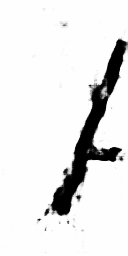

Б image size: (128, 256), rotation: 0


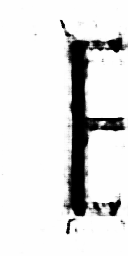

В image size: (128, 256), rotation: 0


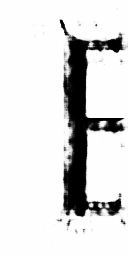

Г image size: (128, 256), rotation: 0


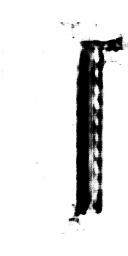

Д image size: (128, 256), rotation: 0


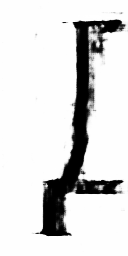

In [ ]:
from PIL import Image, ExifTags

def get_rotation(img):
    try:
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation]=='Orientation':
                break
        exif=dict(img._getexif().items())

        if exif[orientation] == 3:
            return 180
        elif exif[orientation] == 6:
            return 270
        elif exif[orientation] == 8:
            return 90
    except:
        return 0
    return 0

output_dir = "results/font_style_transfer/test_latest/images"
for c in CYRILLIC[:5]:
    file_path = f"{output_dir}/{c}_fake_B.png"
    if os.path.exists(file_path):
        img = Image.open(file_path)
        rotation = get_rotation(img)
        print(f"{c} image size: {img.size}, rotation: {rotation}")

        if rotation != 0:
            img = img.rotate(rotation, expand=True)
            print(f"Rotated {c} size: {img.size}")

        display(img)

    else:
        print(f"Missing output for: {c}")

А image size: (128, 128)


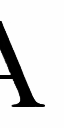

Б image size: (128, 128)


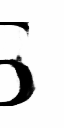

В image size: (128, 128)


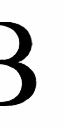

Г image size: (128, 128)


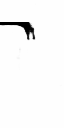

Д image size: (128, 128)


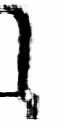

In [ ]:
from PIL import Image

output_dir = "results/font_style_transfer/test_latest/images"
for c in CYRILLIC[:5]:
    file_path = f"{output_dir}/{c}_fake_B.png"
    if os.path.exists(file_path):
        img = Image.open(file_path)
        print(f"{c} image size: {img.size}")

        # Crop right half (target font)
        width, height = img.size
        cropped = img.crop((width // 2, 0, width, height))
        cropped.show()  # Or use display in notebook

        # If in notebook:
        from IPython.display import display
        display(cropped)

    else:
        print(f"Missing output for: {c}")

Output for: А


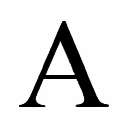

Output for: Б


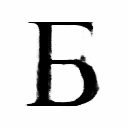

Output for: В


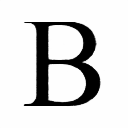

Output for: Г


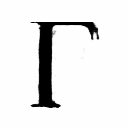

Output for: Д


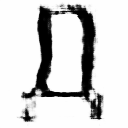

In [ ]:
from IPython.display import Image, display
import os

output_dir = "results/font_style_transfer/test_latest/images"
for c in CYRILLIC[:5]:
    file_path = f"{output_dir}/{c}_fake_B.png"
    if os.path.exists(file_path):
        print(f"Output for: {c}")
        display(Image(filename=file_path))
    else:
        print(f"Missing output for: {c}")

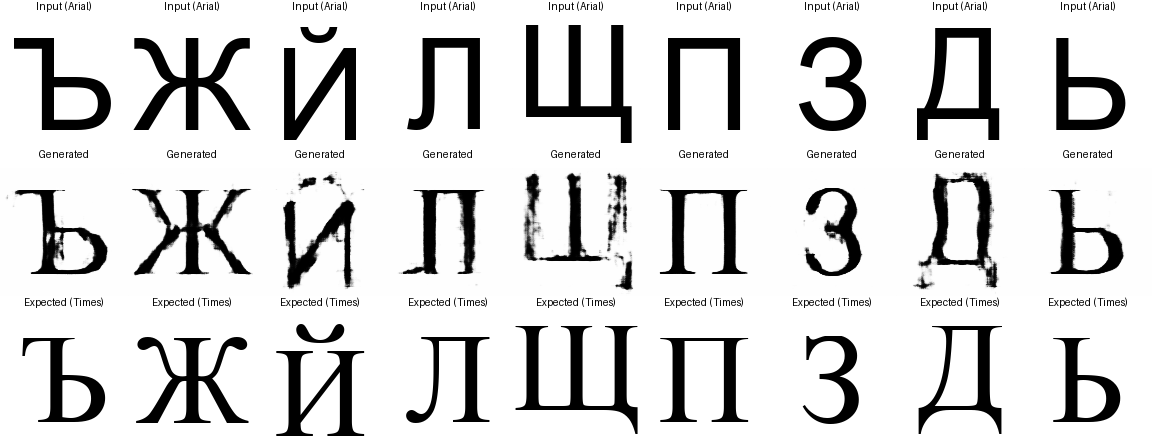

In [ ]:
import random
from PIL import Image, ImageDraw, ImageFont
import os

# Paths
TEST_DIR = "./datasets/font_pix2pix/test"
RESULTS_DIR = "./results/font_style_transfer/test_latest/images"

# Your set of letters (e.g. Cyrillic)
CYRILLIC = 'БГДЕЖЗИЙЛПФЦЧШЩЪЫЬЭЮЯ'

# Select 9 random letters
sample_letters = random.sample(CYRILLIC, 9)

# Constants
IMAGE_SIZE = 128
NUM_COLS = 9
NUM_ROWS = 3
TITLE_HEIGHT = 20
ROW_SPACING = IMAGE_SIZE + TITLE_HEIGHT  # space for title + image per row

# Output canvas size
canvas_width = NUM_COLS * IMAGE_SIZE
canvas_height = NUM_ROWS * ROW_SPACING

# Create canvas
output_image = Image.new("L", (canvas_width, canvas_height), color=255)
draw = ImageDraw.Draw(output_image)

# Titles per row
titles = ["Input (Arial)", "Generated", "Expected (Times)"]

# Load font for titles
try:
    title_font = ImageFont.truetype("arial.ttf", 14)
except:
    title_font = ImageFont.load_default()

# Draw titles for each row, above each image
for row in range(NUM_ROWS):
    for col in range(NUM_COLS):
        title = titles[row]
        x_center = col * IMAGE_SIZE + IMAGE_SIZE // 2
        y_title = row * ROW_SPACING  # top of current row

        # Measure text
        bbox = draw.textbbox((0, 0), title, font=title_font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]

        draw.text((x_center - text_width // 2, y_title), title, fill=0, font=title_font)

# Function to load test input/expected pair
def load_combined_image(letter):
    path = os.path.join(TEST_DIR, f"{letter}.png")
    combined = Image.open(path).convert("L")
    input_img = combined.crop((0, 0, IMAGE_SIZE, IMAGE_SIZE))
    expected_img = combined.crop((IMAGE_SIZE, 0, IMAGE_SIZE * 2, IMAGE_SIZE))
    return input_img, expected_img

# Paste each letter's image into the grid
for col, letter in enumerate(sample_letters):
    input_img, expected_img = load_combined_image(letter)
    gen_img = Image.open(os.path.join(RESULTS_DIR, f"{letter}_fake_B.png")).convert("L")

    images = [input_img, gen_img, expected_img]

    for row in range(NUM_ROWS):
        x = col * IMAGE_SIZE
        y = row * ROW_SPACING + TITLE_HEIGHT
        output_image.paste(images[row], (x, y))

# Save and display
output_image.save("output_grid.png")
from IPython.display import display, Image as IPImage
display(IPImage("output_grid.png"))


In [ ]:
import torch

checkpoint = torch.load("/content/pytorch-CycleGAN-and-pix2pix/checkpoints/font_style_transfer/latest_net_G.pth", map_location='cpu')

print("Checkpoint keys:", checkpoint.keys())

Checkpoint keys: odict_keys(['model.model.0.weight', 'model.model.1.model.1.weight', 'model.model.1.model.2.weight', 'model.model.1.model.2.bias', 'model.model.1.model.2.running_mean', 'model.model.1.model.2.running_var', 'model.model.1.model.2.num_batches_tracked', 'model.model.1.model.3.model.1.weight', 'model.model.1.model.3.model.2.weight', 'model.model.1.model.3.model.2.bias', 'model.model.1.model.3.model.2.running_mean', 'model.model.1.model.3.model.2.running_var', 'model.model.1.model.3.model.2.num_batches_tracked', 'model.model.1.model.3.model.3.model.1.weight', 'model.model.1.model.3.model.3.model.2.weight', 'model.model.1.model.3.model.3.model.2.bias', 'model.model.1.model.3.model.3.model.2.running_mean', 'model.model.1.model.3.model.3.model.2.running_var', 'model.model.1.model.3.model.3.model.2.num_batches_tracked', 'model.model.1.model.3.model.3.model.3.model.1.weight', 'model.model.1.model.3.model.3.model.3.model.2.weight', 'model.model.1.model.3.model.3.model.3.model.2.bi

In [ ]:
import torch
from collections import OrderedDict

def remove_prefix_from_state_dict(state_dict, prefix="model."):
    """Strip prefix from state_dict keys."""
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        if k.startswith(prefix):
            new_key = k[len(prefix):]
        else:
            new_key = k
        new_state_dict[new_key] = v
    return new_state_dict

# Load checkpoint normally
checkpoint = torch.load("/content/pytorch-CycleGAN-and-pix2pix/checkpoints/font_style_transfer/latest_net_G.pth", map_location='cpu')

# Check keys, print first few keys to confirm prefix
print("Original keys (sample):", list(checkpoint.keys())[:10])

# If your checkpoint is a dict with "model" key (like {'model': state_dict, ...}), unwrap it first:
if "model" in checkpoint:
    state_dict = checkpoint["model"]
else:
    state_dict = checkpoint

# Strip prefix if needed:
clean_state_dict = remove_prefix_from_state_dict(state_dict, prefix="model.")

# Now load model and load cleaned weights
from models.networks import define_G

netG = define_G(
    input_nc=1, output_nc=1, ngf=64,
    netG='resnet_9blocks', norm='instance',
    use_dropout=False, init_type='normal', init_gain=0.02, gpu_ids=[]
)

missing, unexpected = netG.load_state_dict(clean_state_dict, strict=False)

print(f"Missing keys: {missing}")
print(f"Unexpected keys: {unexpected}")

netG.eval()

Original keys (sample): ['model.model.0.weight', 'model.model.1.model.1.weight', 'model.model.1.model.2.weight', 'model.model.1.model.2.bias', 'model.model.1.model.2.running_mean', 'model.model.1.model.2.running_var', 'model.model.1.model.2.num_batches_tracked', 'model.model.1.model.3.model.1.weight', 'model.model.1.model.3.model.2.weight', 'model.model.1.model.3.model.2.bias']
initialize network with normal
Missing keys: ['model.1.weight', 'model.1.bias', 'model.4.weight', 'model.4.bias', 'model.7.weight', 'model.7.bias', 'model.10.conv_block.1.weight', 'model.10.conv_block.1.bias', 'model.10.conv_block.5.weight', 'model.10.conv_block.5.bias', 'model.11.conv_block.1.weight', 'model.11.conv_block.1.bias', 'model.11.conv_block.5.weight', 'model.11.conv_block.5.bias', 'model.12.conv_block.1.weight', 'model.12.conv_block.1.bias', 'model.12.conv_block.5.weight', 'model.12.conv_block.5.bias', 'model.13.conv_block.1.weight', 'model.13.conv_block.1.bias', 'model.13.conv_block.5.weight', 'mode

ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(1, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [ ]:
import torch
from models.networks import define_G

def load_generator(model_path):
    netG = define_G(
        input_nc=1, output_nc=1, ngf=64,
        netG='resnet_9blocks', norm='instance',
        use_dropout=False, init_type='normal', init_gain=0.02, gpu_ids=[]
    )
    state_dict = torch.load(model_path, map_location='cpu')
    netG.load_state_dict(state_dict)
    netG.eval()
    return netG

model = load_generator(
    "/content/pytorch-CycleGAN-and-pix2pix/checkpoints/font_style_transfer/latest_net_G.pth"
)

initialize network with normal


RuntimeError: Error(s) in loading state_dict for ResnetGenerator:
	Missing key(s) in state_dict: "model.1.weight", "model.1.bias", "model.4.weight", "model.4.bias", "model.7.weight", "model.7.bias", "model.10.conv_block.1.weight", "model.10.conv_block.1.bias", "model.10.conv_block.5.weight", "model.10.conv_block.5.bias", "model.11.conv_block.1.weight", "model.11.conv_block.1.bias", "model.11.conv_block.5.weight", "model.11.conv_block.5.bias", "model.12.conv_block.1.weight", "model.12.conv_block.1.bias", "model.12.conv_block.5.weight", "model.12.conv_block.5.bias", "model.13.conv_block.1.weight", "model.13.conv_block.1.bias", "model.13.conv_block.5.weight", "model.13.conv_block.5.bias", "model.14.conv_block.1.weight", "model.14.conv_block.1.bias", "model.14.conv_block.5.weight", "model.14.conv_block.5.bias", "model.15.conv_block.1.weight", "model.15.conv_block.1.bias", "model.15.conv_block.5.weight", "model.15.conv_block.5.bias", "model.16.conv_block.1.weight", "model.16.conv_block.1.bias", "model.16.conv_block.5.weight", "model.16.conv_block.5.bias", "model.17.conv_block.1.weight", "model.17.conv_block.1.bias", "model.17.conv_block.5.weight", "model.17.conv_block.5.bias", "model.18.conv_block.1.weight", "model.18.conv_block.1.bias", "model.18.conv_block.5.weight", "model.18.conv_block.5.bias", "model.19.weight", "model.19.bias", "model.22.weight", "model.22.bias", "model.26.weight", "model.26.bias". 
	Unexpected key(s) in state_dict: "model.model.0.weight", "model.model.1.model.1.weight", "model.model.1.model.2.weight", "model.model.1.model.2.bias", "model.model.1.model.2.running_mean", "model.model.1.model.2.running_var", "model.model.1.model.2.num_batches_tracked", "model.model.1.model.3.model.1.weight", "model.model.1.model.3.model.2.weight", "model.model.1.model.3.model.2.bias", "model.model.1.model.3.model.2.running_mean", "model.model.1.model.3.model.2.running_var", "model.model.1.model.3.model.2.num_batches_tracked", "model.model.1.model.3.model.3.model.1.weight", "model.model.1.model.3.model.3.model.2.weight", "model.model.1.model.3.model.3.model.2.bias", "model.model.1.model.3.model.3.model.2.running_mean", "model.model.1.model.3.model.3.model.2.running_var", "model.model.1.model.3.model.3.model.2.num_batches_tracked", "model.model.1.model.3.model.3.model.3.model.1.weight", "model.model.1.model.3.model.3.model.3.model.2.weight", "model.model.1.model.3.model.3.model.3.model.2.bias", "model.model.1.model.3.model.3.model.3.model.2.running_mean", "model.model.1.model.3.model.3.model.3.model.2.running_var", "model.model.1.model.3.model.3.model.3.model.2.num_batches_tracked", "model.model.1.model.3.model.3.model.3.model.3.model.1.weight", "model.model.1.model.3.model.3.model.3.model.3.model.2.weight", "model.model.1.model.3.model.3.model.3.model.3.model.2.bias", "model.model.1.model.3.model.3.model.3.model.3.model.2.running_mean", "model.model.1.model.3.model.3.model.3.model.3.model.2.running_var", "model.model.1.model.3.model.3.model.3.model.3.model.2.num_batches_tracked", "model.model.1.model.3.model.3.model.3.model.3.model.3.model.1.weight", "model.model.1.model.3.model.3.model.3.model.3.model.3.model.3.weight", "model.model.1.model.3.model.3.model.3.model.3.model.3.model.4.weight", "model.model.1.model.3.model.3.model.3.model.3.model.3.model.4.bias", "model.model.1.model.3.model.3.model.3.model.3.model.3.model.4.running_mean", "model.model.1.model.3.model.3.model.3.model.3.model.3.model.4.running_var", "model.model.1.model.3.model.3.model.3.model.3.model.3.model.4.num_batches_tracked", "model.model.1.model.3.model.3.model.3.model.3.model.5.weight", "model.model.1.model.3.model.3.model.3.model.3.model.6.weight", "model.model.1.model.3.model.3.model.3.model.3.model.6.bias", "model.model.1.model.3.model.3.model.3.model.3.model.6.running_mean", "model.model.1.model.3.model.3.model.3.model.3.model.6.running_var", "model.model.1.model.3.model.3.model.3.model.3.model.6.num_batches_tracked", "model.model.1.model.3.model.3.model.3.model.5.weight", "model.model.1.model.3.model.3.model.3.model.6.weight", "model.model.1.model.3.model.3.model.3.model.6.bias", "model.model.1.model.3.model.3.model.3.model.6.running_mean", "model.model.1.model.3.model.3.model.3.model.6.running_var", "model.model.1.model.3.model.3.model.3.model.6.num_batches_tracked", "model.model.1.model.3.model.3.model.5.weight", "model.model.1.model.3.model.3.model.6.weight", "model.model.1.model.3.model.3.model.6.bias", "model.model.1.model.3.model.3.model.6.running_mean", "model.model.1.model.3.model.3.model.6.running_var", "model.model.1.model.3.model.3.model.6.num_batches_tracked", "model.model.1.model.3.model.5.weight", "model.model.1.model.3.model.6.weight", "model.model.1.model.3.model.6.bias", "model.model.1.model.3.model.6.running_mean", "model.model.1.model.3.model.6.running_var", "model.model.1.model.3.model.6.num_batches_tracked", "model.model.1.model.5.weight", "model.model.1.model.6.weight", "model.model.1.model.6.bias", "model.model.1.model.6.running_mean", "model.model.1.model.6.running_var", "model.model.1.model.6.num_batches_tracked", "model.model.3.weight", "model.model.3.bias". 

In [ ]:
import torch
from models.networks import define_G

checkpoint_path = '/content/pytorch-CycleGAN-and-pix2pix/checkpoints/font_style_transfer/latest_net_G.pth'
checkpoint = torch.load(checkpoint_path, map_location='cpu')

if 'G_A' in checkpoint:
    state_dict = checkpoint['G_A']
elif 'state_dict' in checkpoint:
    state_dict = checkpoint['state_dict']
else:
    state_dict = checkpoint



netG_A = define_G(input_nc=1, output_nc=1, ngf=64, netG='unet_128', norm='batch', use_dropout=False, init_type='normal', init_gain=0.02, gpu_ids=[])
netG_A.load_state_dict(state_dict)

initialize network with normal


<All keys matched successfully>

In [ ]:
print("Fixed keys:", list(flat_state_dict.keys())[:10])
print("Model keys:", list(netG_A.state_dict().keys())[:10])

Fixed keys: ['model.weight', 'model.1.weight', 'model.2.weight', 'model.2.bias', 'model.2.running_mean', 'model.2.running_var', 'model.2.num_batches_tracked', 'model.3.1.weight', 'model.3.2.weight', 'model.3.2.bias']
Model keys: ['model.1.weight', 'model.2.weight', 'model.2.bias', 'model.2.running_mean', 'model.2.running_var', 'model.2.num_batches_tracked', 'model.4.weight', 'model.5.weight', 'model.5.bias', 'model.5.running_mean']


In [ ]:
torch.save(netG_A.state_dict(), 'G_A_weights.pth')

In [ ]:
from google.colab import files
files.download('G_A_weights.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>